# Projet Machine Learning - Notebook R

---


In [38]:
# Installation des packages nécessaires :

# install.packages('gtsummary')
# install.packages("tidyr")
# install.packages("GGally")

Installation du package dans ‘/home/chalet/R/libs’
(car ‘lib’ n'est pas spécifié)

installation des dépendances ‘patchwork’, ‘ggstats’




In [1]:
# Chargement des librairies nécessaires :
# library(gtsummary)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(ggfortify)
library(GGally)
library(corrplot)
library(FactoMineR)
library(factoextra)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [4]:
# Chargement des données :
path <- "../"
data = read.table(paste(path, "Data_Sustainable_Energy.csv", sep = ""), sep = ",", header = TRUE)

## Analyse Exploratoire des données

In [5]:
# Premiere visualisation du jeu de données :
head(data)
str(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Notre jeu de données "data" est un data frame contenant
- 3649 observations (lignes)
- 21 variables (colonnes)

Parmis ces dernières, nous pouvons observer :
- 2 variables qualitatives : Entity (176 pays) et Year (21 années)
- 19 variables quantitatives

In [6]:
# Transformation des données (qualitatif/quantitatif)

data$Entity = as.factor(data$Entity) # ok : 176 niveaux : 176 pays : ok
data$Year = as.factor(data$Year) # ok : 21 niveaux : cohérent car de 2000 à 2020 : ok
data$Density.n.P.Km2. = as.numeric(gsub(",","", data$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclea

In [13]:
# Analyse des valeurs manquantes :

B = summary(data) # nous permet de regarder le nombre de NA par variable

Val_Manquante = data.frame(B[7,]) # on récupère seulement le nombre de NA par variable

Val_Manquante = separate(Val_Manquante, B.7..., c("Type", "Val"), sep=":") # création d'un tableau avec les valeurs

Val_Manquante$Val = as.numeric(gsub(",",".", Val_Manquante$Val))
Val_Manquante$Val = Val_Manquante$Val/36.49 # calcul d'un pourcentage

Val_Manquante

,B.7...
,<chr>
Entity,(Other) :3523
Year,(Other):2599
Access.to.electricity....of.population.,NA's :10
Access.to.clean.fuels.for.cooking,NA's :169
Renewable.electricity.generating.capacity.per.capita,NA's :931
Financial.flows.to.developing.countries..US...,NA's :2089
Renewable.energy.share.in.the.total.final.energy.consumption....,NA's :194
Electricity.from.fossil.fuels..TWh.,NA's :21
Electricity.from.nuclear..TWh.,NA's :126


D'après ce tableau, nous pouvons observer que les variables contenant le plus de valeurs manquantes sont :
- Renewable.electricity.generating.capacity.per.capita (colonne 5)
- Financial.flows.to.developping.countries..US... (colonne 6)
- Renewables....equivalent.primary.energy (colonne 15)

In [38]:
# Suppression des variables contenant trop de valeur manquantes : 
data = data[,c(-5, -6, -15)]
str(data) # ok c'est le bon truc

'data.frame':	3649 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low.carbon.electricity....electrici

In [39]:
# On regarde le nombre de na par ligne (on veut suppr les lignes où y'a des na pour en avoir aucune)
data = na.omit(data)
# on renomme nos variables car les noms sont trop longs.
colnames(data) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
                     "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
                     "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude")
str(data) # on a bien 2868 lignes et nos noms de variables ont bien été modifiés

summary(data)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                  : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec        : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels       : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables  : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec       : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons      : num  230 204 252 304 354 ...
 $ Energy_intensity_level: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2             : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth            : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita            : num  191 211 242 26

                 Entity          Year      Access_to_elec    Access_to_fuels 
 Algeria            :  20   2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Angola             :  20   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000   Median : 81.55  
 Argentina          :  20   2017   : 146   Mean   : 76.585   Mean   : 62.17  
 Armenia            :  20   2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
 Australia          :  20   2019   : 146   Max.   :100.000   Max.   :100.00  
 (Other)            :2748   (Other):1990                                     
 Renewable_energy_share Elec_from_fossils  Elec_from_nuclear
 Min.   : 0.000         Min.   :   0.000   Min.   :  0.00   
 1st Qu.: 9.188         1st Qu.:   0.290   1st Qu.:  0.00   
 Median :28.790         Median :   2.995   Median :  0.00   
 Mean   :35.802         Mean   :  76.694   Mean   : 15.34   
 3rd Qu.:60.667         3rd Qu.:  25.788   3rd Qu.:  0.00   
 Max.   :9

### Analyse unidimensionnelle

Plot chaque variable en histogramme, quelles variables on transforme ? Peut être renormalisation de certaines? 

**Question 4 :** histogramme, boxplot, standardiser et/ou appliquer transformations

**Unités des variables**

% : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

TWh : Electricity (6, 7, 8)

KWh : Primary energy consumption (10) ;

Mj : Energy intensity level (11) ;

Metrcis tones per capita : Value CO2 (12) ;

PIB : GDP per capita (14)

P/Km² : Density (15)

Km² : Land area (16)

° : Latitude (17) ; Longitude (18)

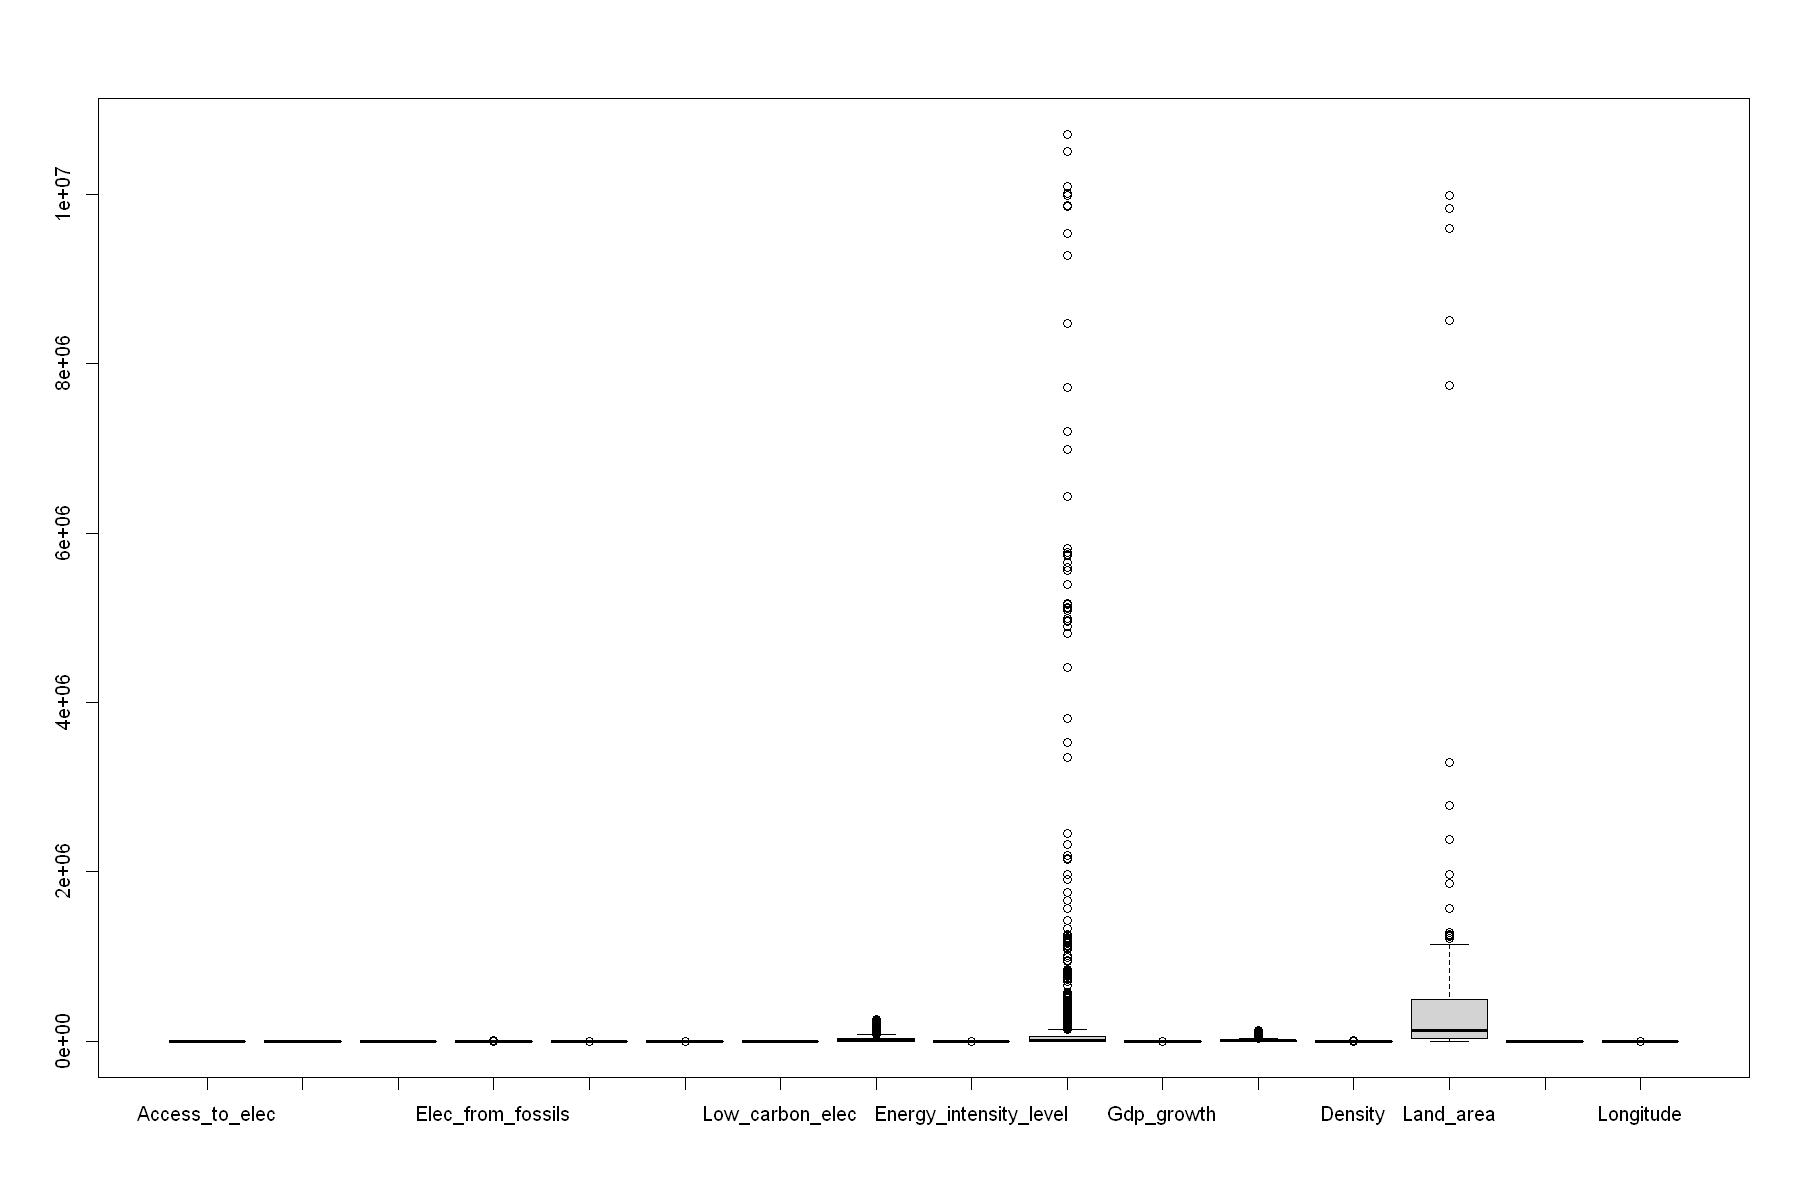

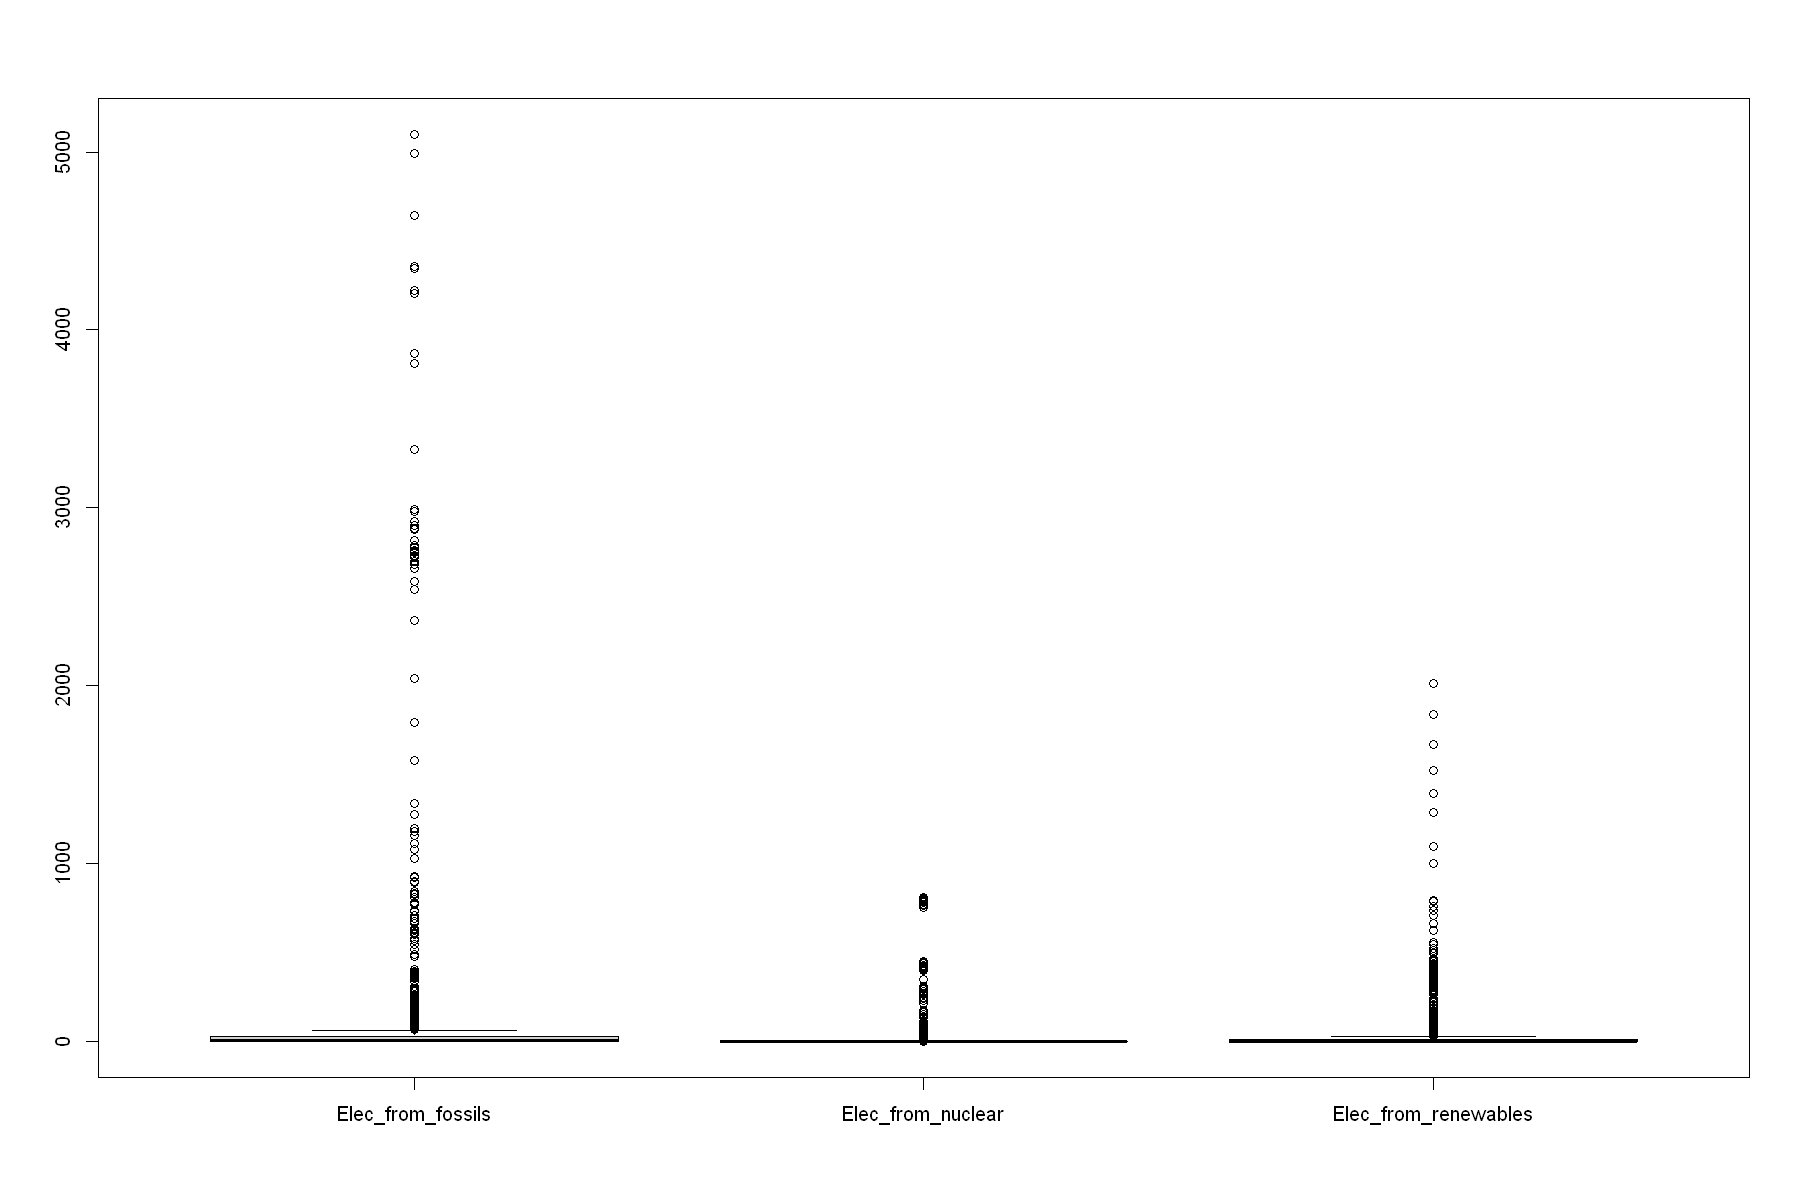

In [40]:
## Faire phrase d'interprétation avec unités pour dire qu'on compare pas pour l'instant.


options(repr.plot.width = 15, repr.plot.height = 10)

boxplot(data[,-c(1,2)]) # on voit pas grand chose : pas les mêmes unités et échelles

boxplot(data[,c(6:8)]) # boxplot electricity : on n'y voit rien : trop de outliers

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

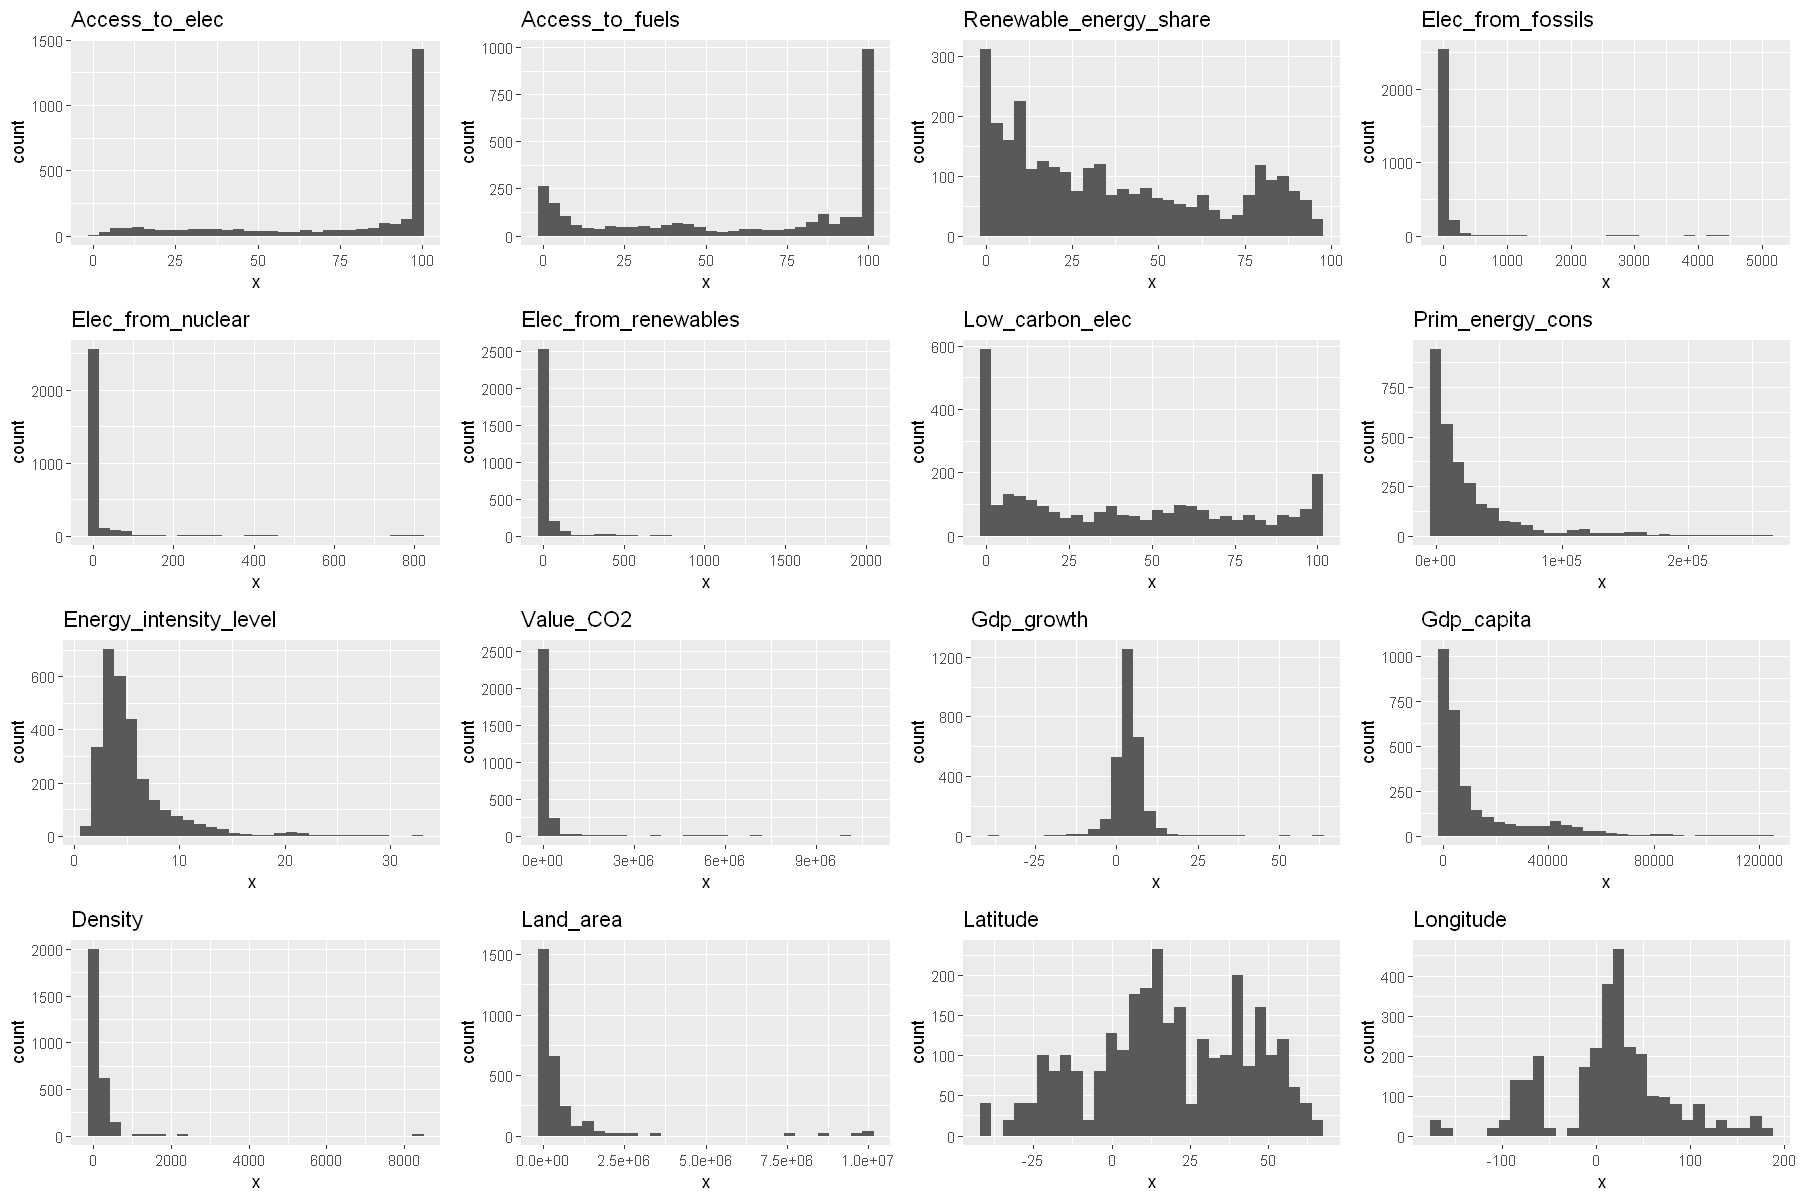

In [41]:
# tentative d'histogrammes par boucle avant transformation des données

p = list()
j=1

for (i in names(data)){
    # on affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        data_copy <- data[[i]] # on créé une copie des données à chaque itération
        p[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=i)
    } 
}
                 
grid.arrange(grobs=p)

D'après les histogrammes, on peut voir que certaines variables ne sont pas gaussiennes. Or pour la suite nous aurons besoin de les rendre gaussiennes dans certains modèles. 
On souhaiterait transformer les variables suivantes en leur appliquant un log : 
- 

[1] "Access_to_fuels"
[1] "Renewable_energy_share"
[1] "Elec_from_fossils"
[1] "Elec_from_nuclear"
[1] "Elec_from_renewables"
[1] "Low_carbon_elec"
[1] "Gdp_growth"


Warning message in log(data[, i] + 1):
"Production de NaN"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 225 rows containing non-finite values (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `

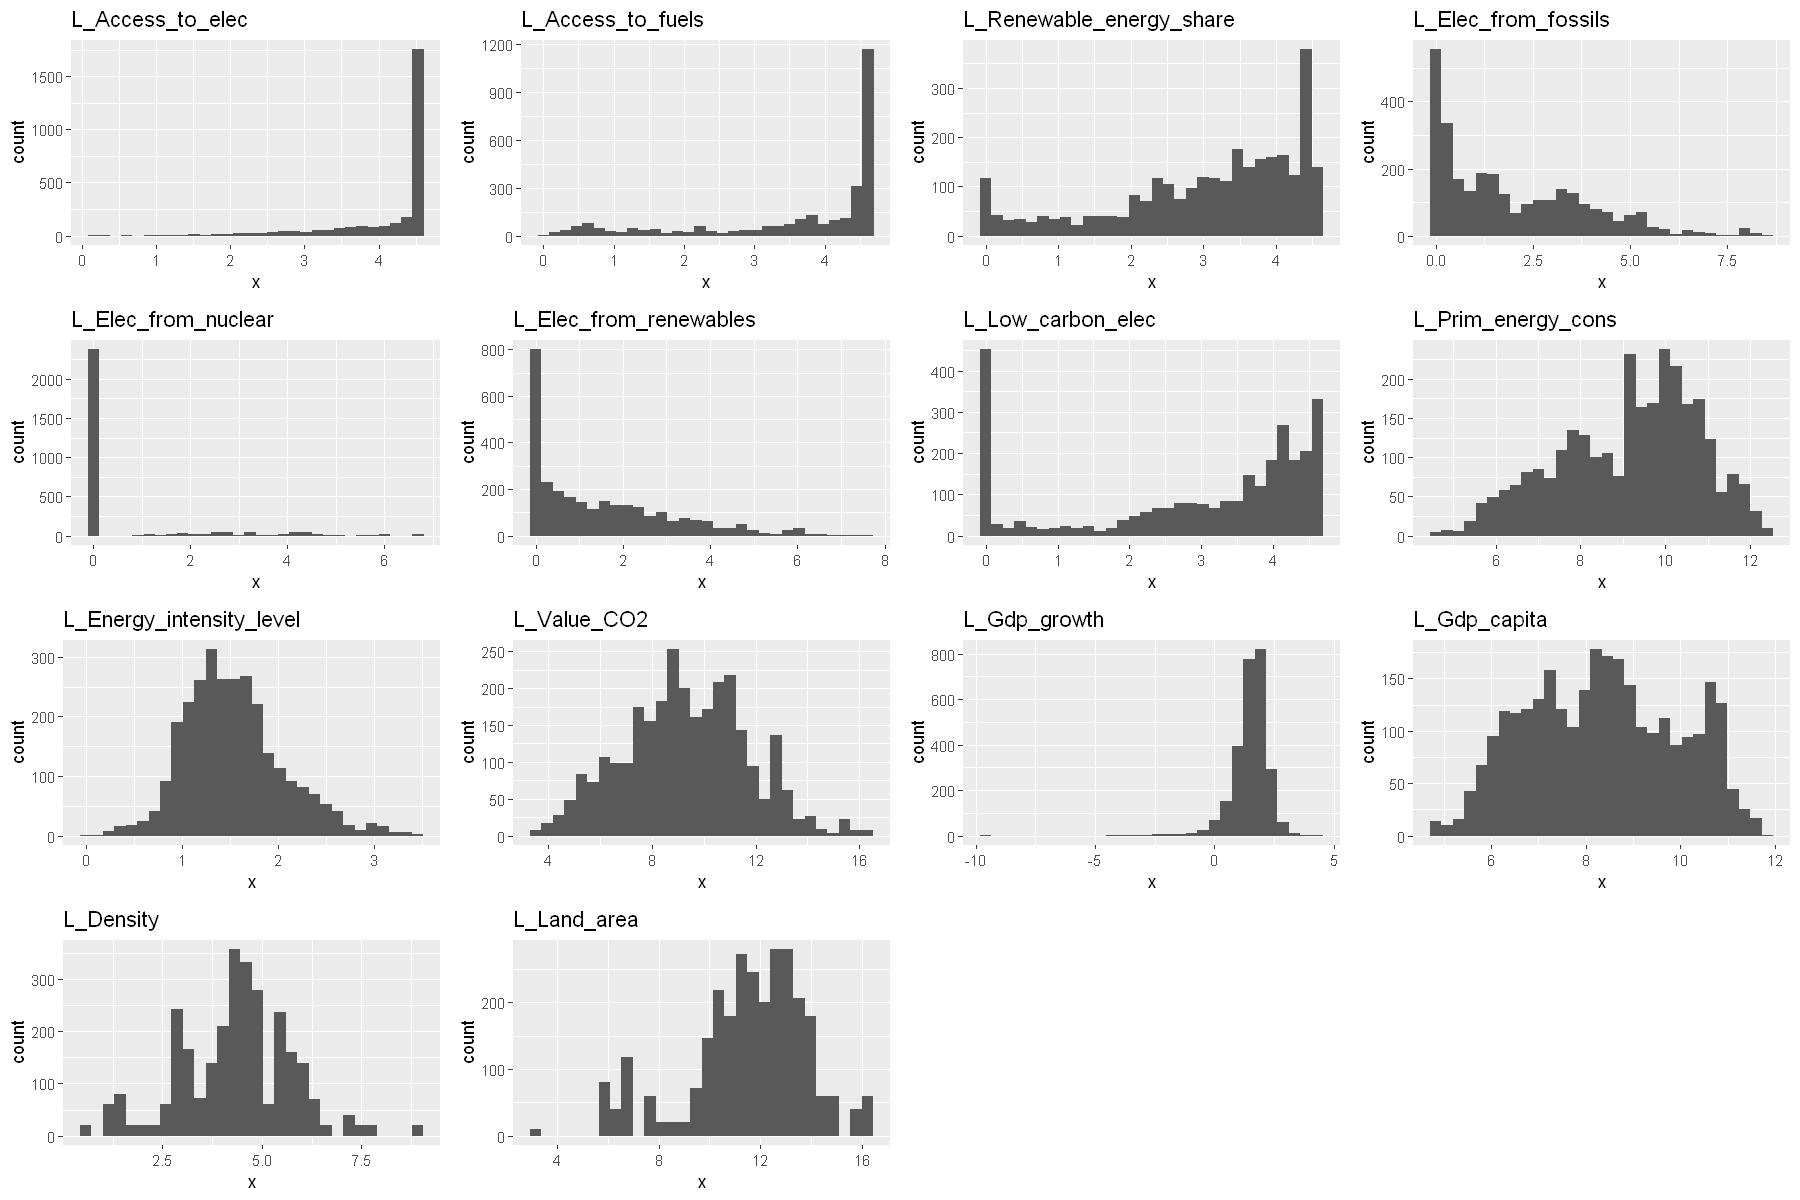

In [42]:
l = list()

# Mettre que les variables que l'on veut changer / ne pas log tout directement

Var_names = names(data4[,1:16])

for (i in Var_names){
    # on n'affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        L_var <- paste("L_",i,sep="")
        if (all(data[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
            data[,L_var] <- log(data[,i])
        } else {
            print(i)
            data[,L_var] <- log(data[,i]+1)
        }
        data_copy <- data[[L_var]] # on créé une copie des données à chaque itération
        l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
    } 
}
                 
grid.arrange(grobs=l)

In [43]:
str(data)

'data.frame':	2868 obs. of  32 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils       : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables    : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons        : num  230 204 252 304 354 ...
 $ Energy_intensity_level  : num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita       

In [45]:
data_centre <- data[,c(1,2,3,4,5,22,23,24,9,26,27,12,13,30,31,32,17,18)]
str(data_centre)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  0.27 0.285 0.293 0.182 0.182 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.489 0.445 0.464 0.495 0.56 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 ...
 $ L_Den

On va restandardiser : 

- On tente un log sur celles qui ont un pic d'un côté.
- On tente racine sur d'autres.

Proposition à faire à Emilight et Paolight :
- Gdp grosse en sqrt et le reste en log point final à la ligne arretez de discuter.

Et on enlève celle qu'on utilise plus.

In [22]:
# A RUN UNE SEULE FUCKING FOIS PAS DEUX PAS TROIS ESPECE DE GROS CON 

# data4 <- data4[,c(1, 2, 3, 4, 5, 21, 23, 25, 9, 27, 29, 12, 34, 35, 37, 39, 17, 18)]
#str(data4)

**Nature des variables**

Faire blabla sur type des variables : en tout 18 variables 
- Entity et Year = 2 qualitatives (qui sont bien en facteurs)
- Le reste quantitative = 16 

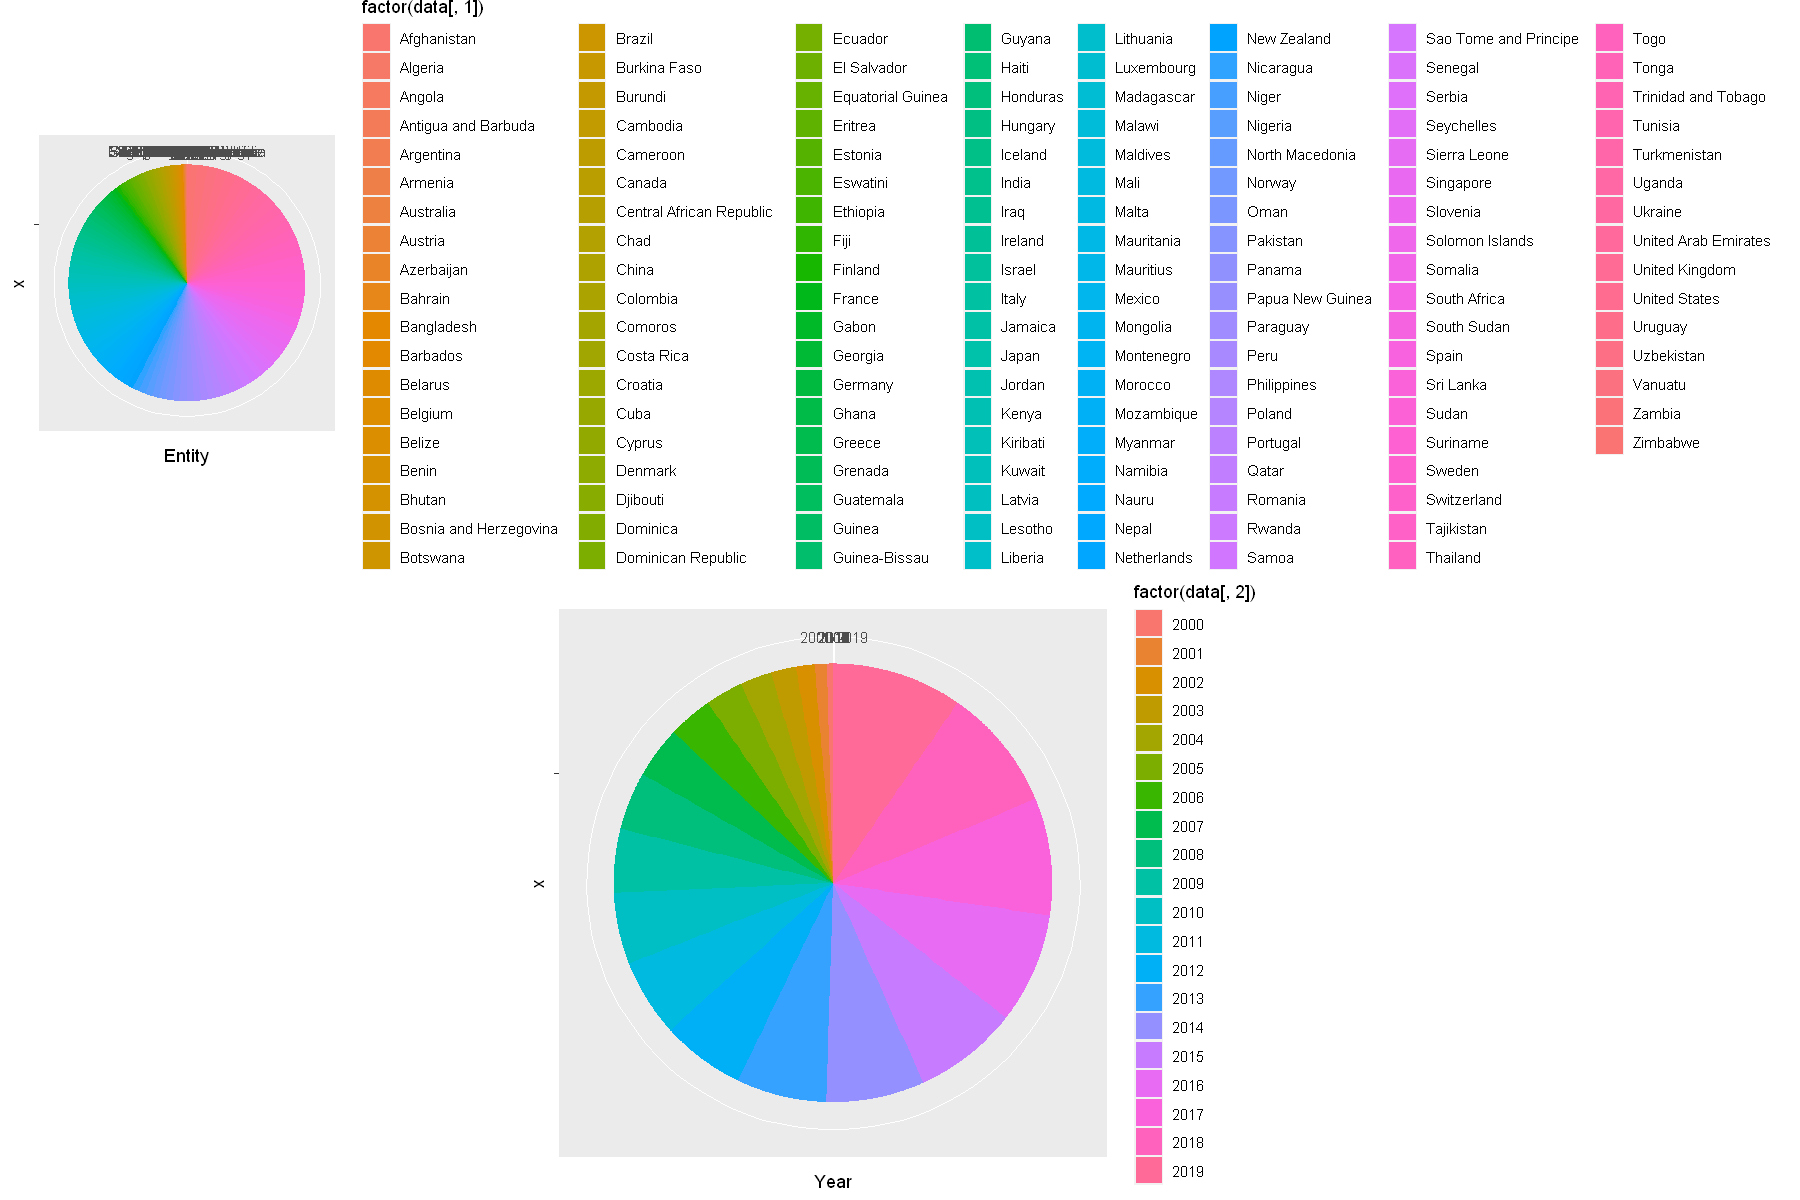

In [49]:
# Piechart

options(repr.plot.width = 15, repr.plot.height = 10)

p1 = ggplot(data, aes(x="", y=Entity, fill=factor(data[,1]))) + geom_col() + coord_polar(theta = "y") # pays on enlève
p2 = ggplot(data, aes(x="", y=Year, fill=factor(data[,2]))) + geom_col() + coord_polar(theta = "y")

grid.arrange(p1,p2, ncol=1)

**Interprétation**

Comme on a enlevé les lignes contenant des données manquantes, certains pays ont moins de relevé par années que d'autres. Il est important de prendre cela en compte. C'est ce qu'on observe sur ce pie, certaines années ont plus de valeurs que d'autres.

**Grande heterogeneite de CO2**

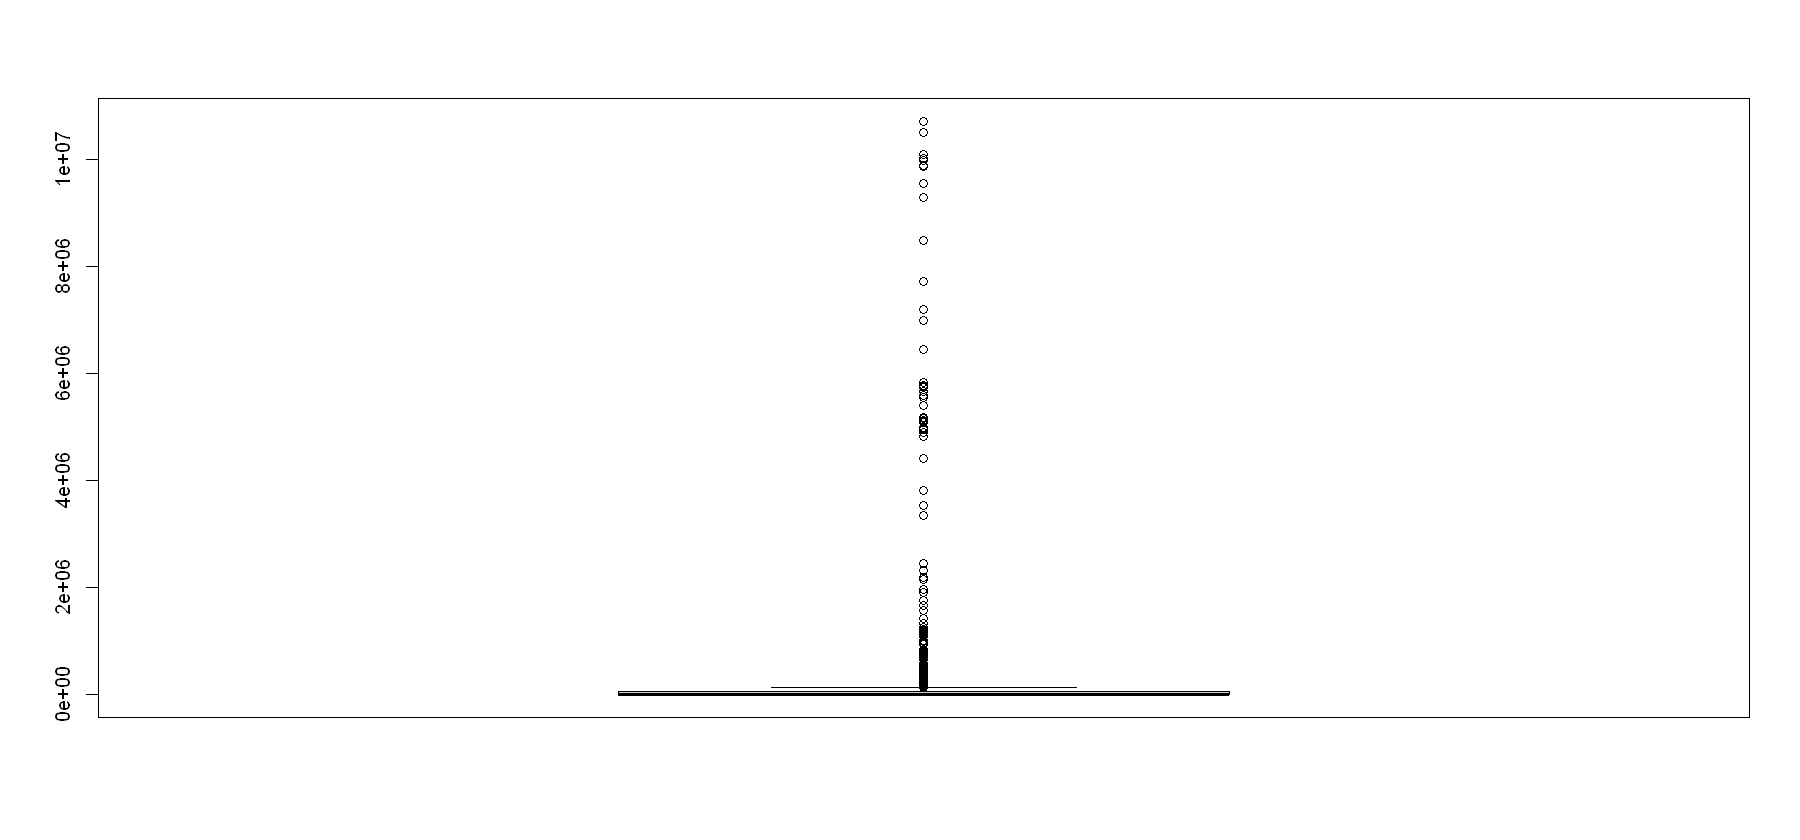

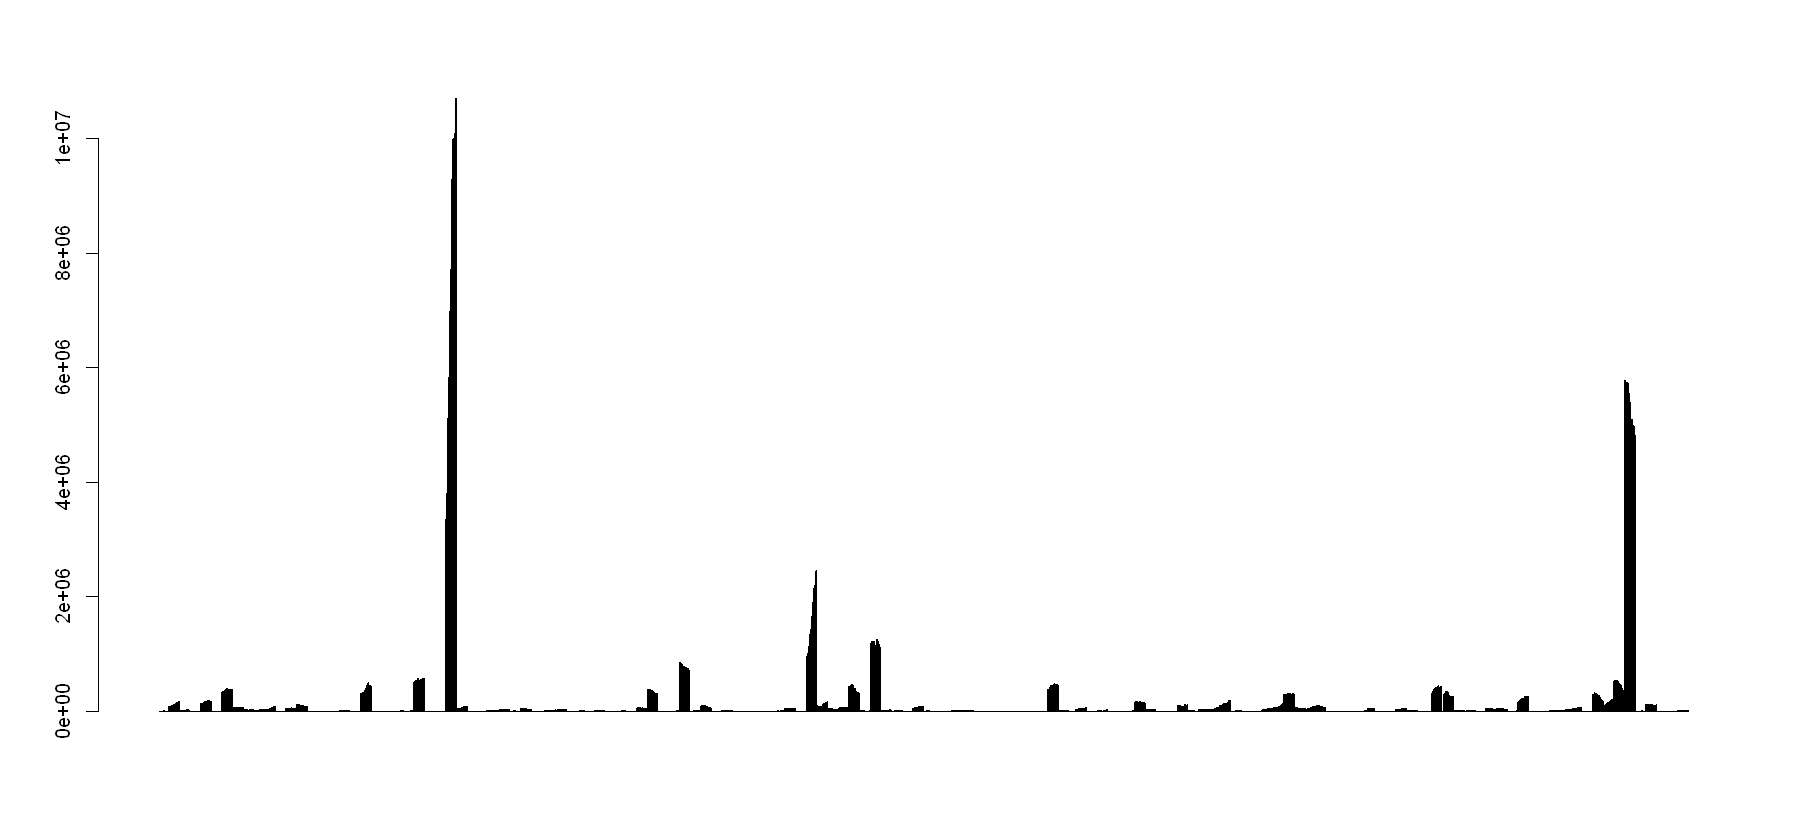

In [50]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data[,12])
barplot(data[,12])

In [54]:
### nb_annee_pays = list()

j=1

for (i in levels(data_centre[,1])) {
    nb_annee_pays[[j]] = sum(grepl(i, data_centre$Entity))
    j=j+1
}

moy_annee_co2 = list() ## TESTER AFFICHER SUR UNE MAP

No = 1

for (j in levels(data4[["Entity"]])) {
    data_sub = subset(data_centre, data4$Entity==j)
    # moy_value_co2[[No]] = c(j, sum(data_sub[,12])/nb_annee_pays[[No]])
    moy_annee_co2[[No]] = sum(data_sub[,12])/nb_annee_pays[[No]]
    No = No+1
}

moy_annee_co2 = data.frame(moy_annee_co2)

colnames(moy_annee_co2) = levels(data4[["Entity"]])

# head(moy_annee_co2)

# order(moy_annee_co2)

moy_annee_co2 = t(moy_annee_co2)

colnames(moy_annee_co2) = c("Moyenne_CO2")

head(moy_annee_co2)

moy_ordonnee = order(moy_annee_co2, decreasing=TRUE)

head(moy_annee_co2[moy_ordonnee,])

,Moyenne_CO2
Afghanistan,4643.529
Albania,NaN
Algeria,119921.000
Angola,21689.500
Antigua and Barbuda,513.000
Argentina,160462.002


China United States         India         Japan       Germany 
    7636642.5     5329538.5     1633979.0     1183734.5      773644.5 
       Canada 
     547644.5

En faisant une moyenne de la consommation de CO2 des différents pays sur les années observées, on observe que les pays le splus polluants sont : 
- La Chine
- Les Etats-Unis
- L'Inde
- Le Japon
- L'Allemagne

### Analyse Descriptive Multidimensionnelle

In [41]:
# str(data5)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  -1.17 -1.11 -1.08 -1.61 -1.61 ...
 $ L_Elec_from_nuclear     : num  -Inf -Inf -Inf -Inf -Inf ...
 $ L_Elec_from_renewables  : num  -0.462 -0.58 -0.528 -0.446 -0.288 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 .

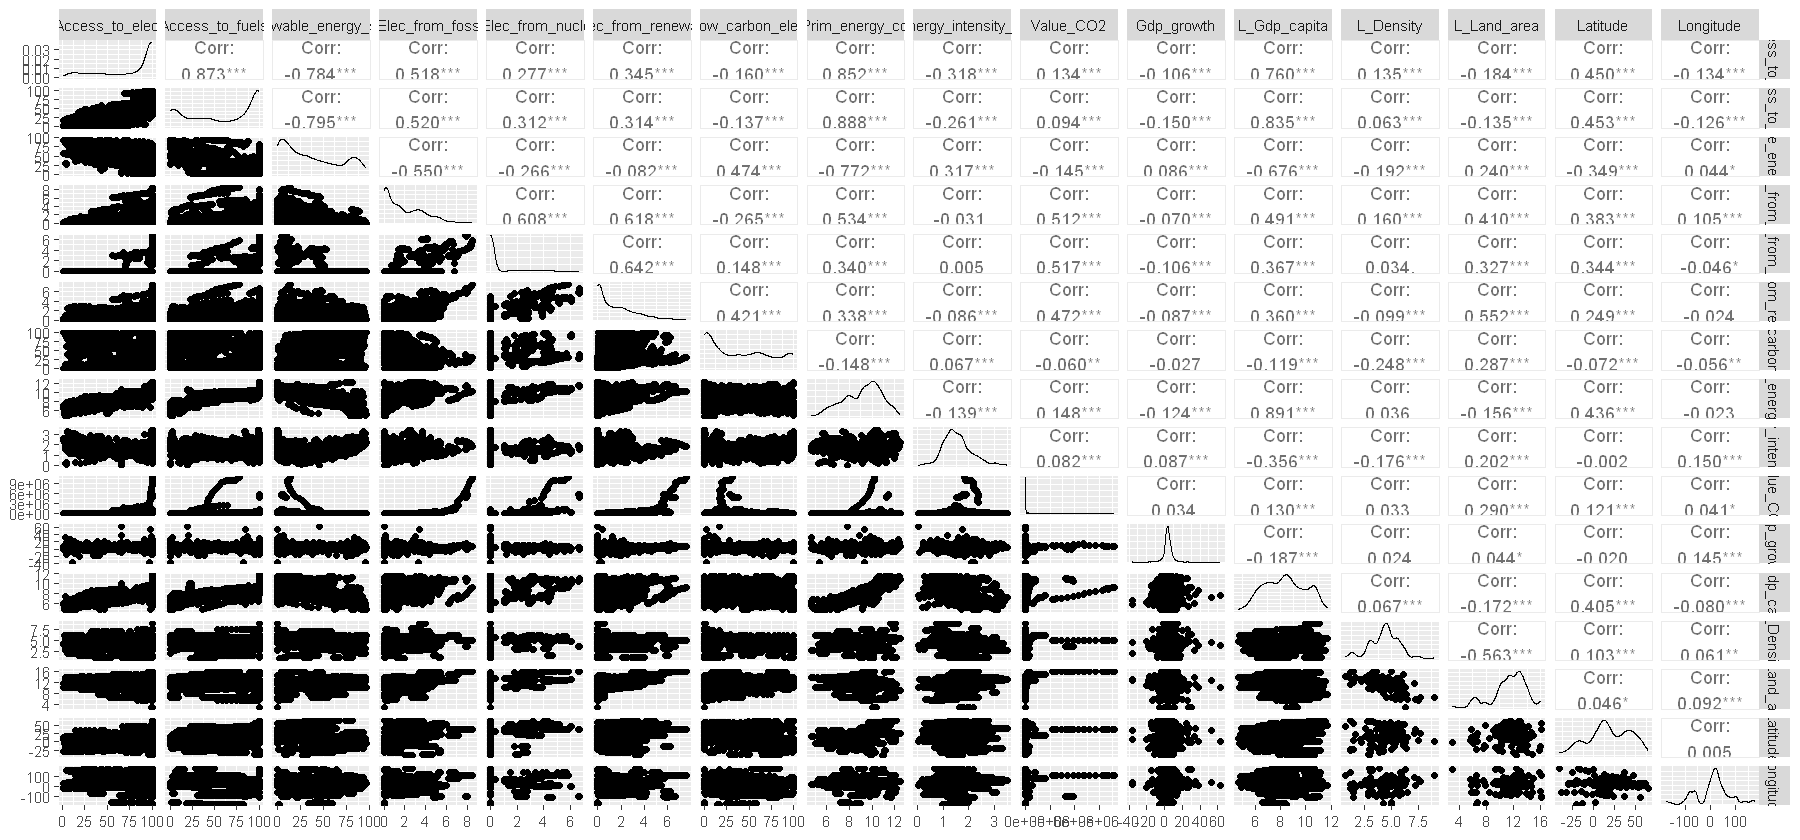

In [52]:
# on regarde les dépendances 2 à 2
ggpairs(data_centre[,c(3:18)])

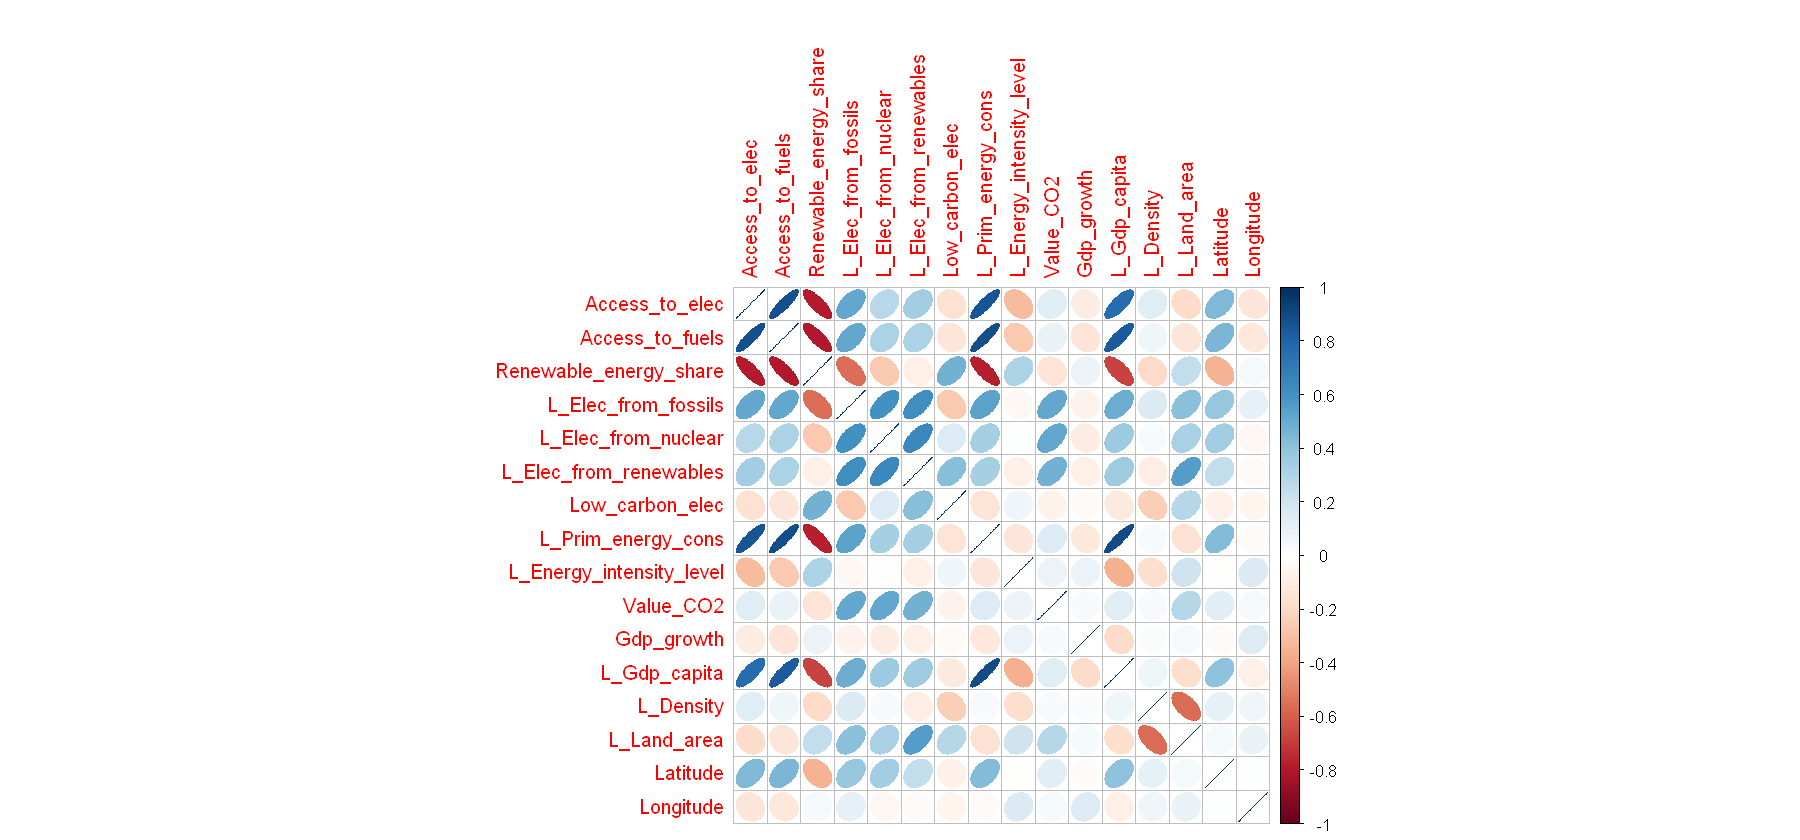

In [24]:
corrplot(cor(data_centre[,3:18]), method="ellipse")

D'après le graphe des corrélations, on peut remarquer de fortes corrélations positives entre :
- Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- plus faiblement : L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables

On peut aussi observer des corrélations négatives entre : 
- Renewable_energy_share et Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- plus faiblement : L_Land_area et L_Density

La variable C02 semble corrélée avec les trois variables élec.

Il semble exister des corrélations avec la latitude mais pas spécialiement avec la longitude. Position Nord/Sud impacte sur le CO2 (pays développés ?)

Gdp growth semble être corrélée à pas grand chose. Longitude aussi.

### Analyse en Composantes Principales

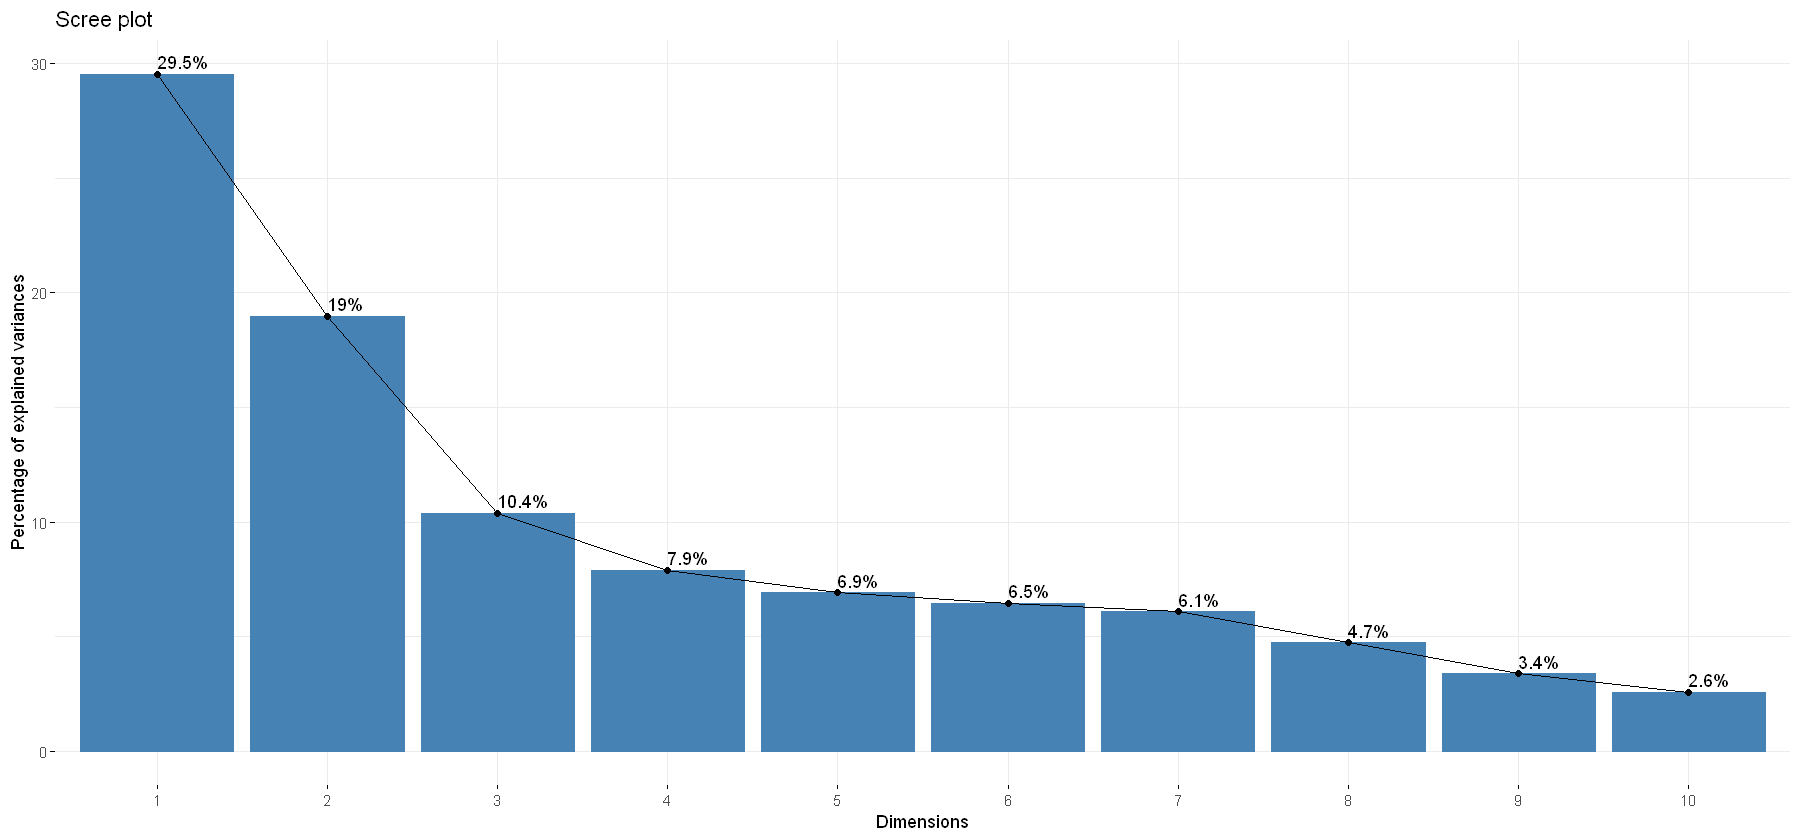

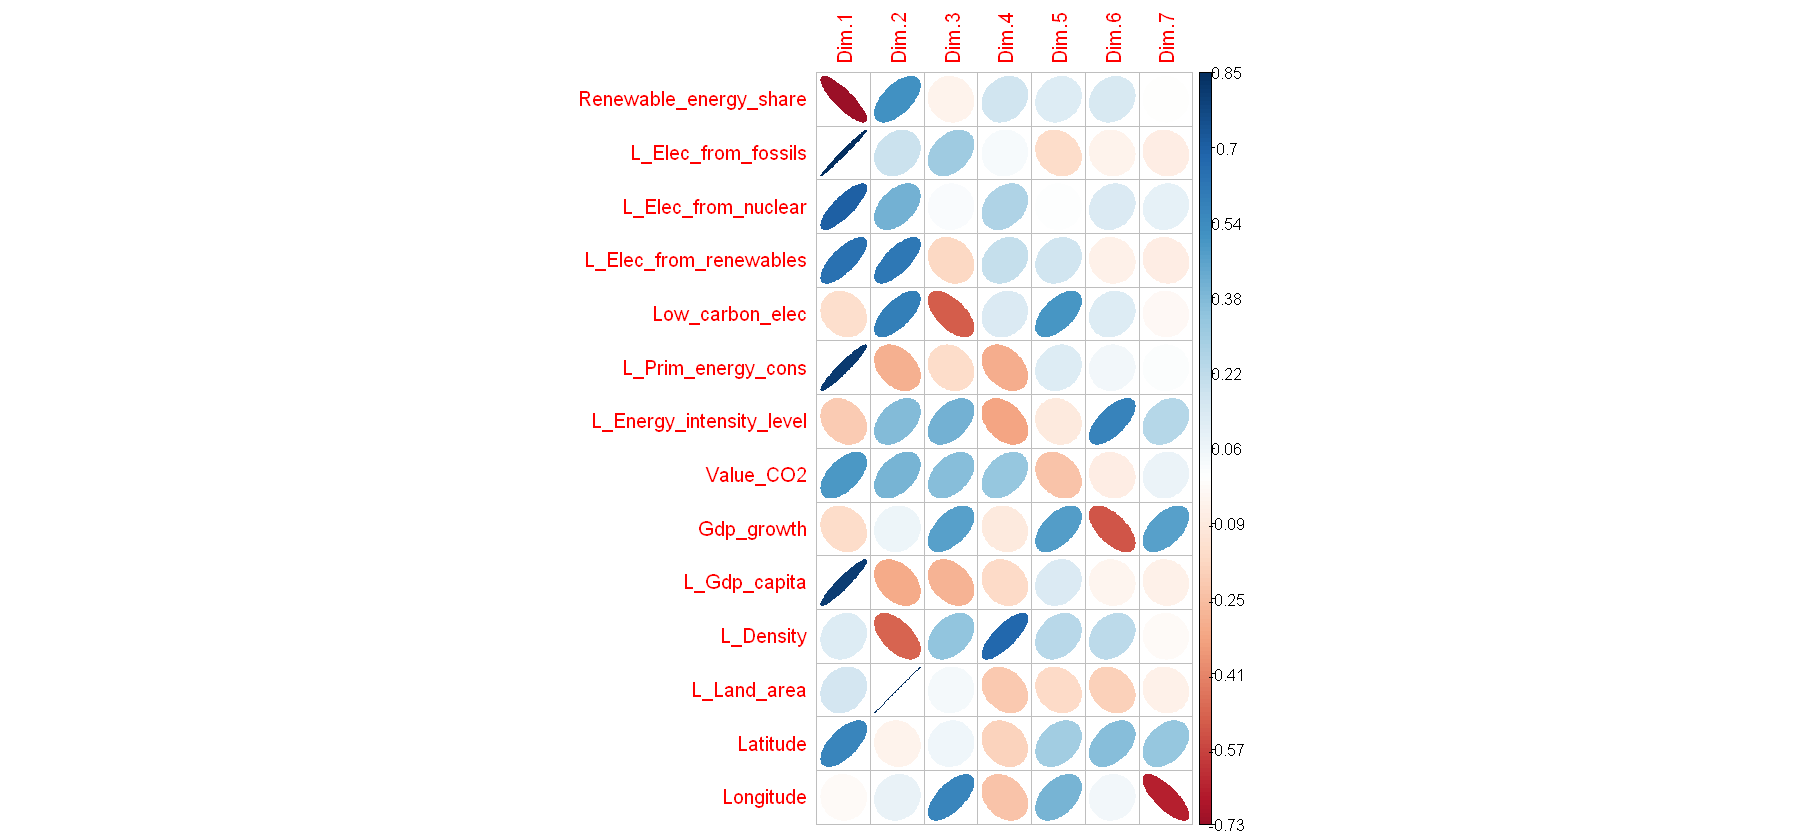

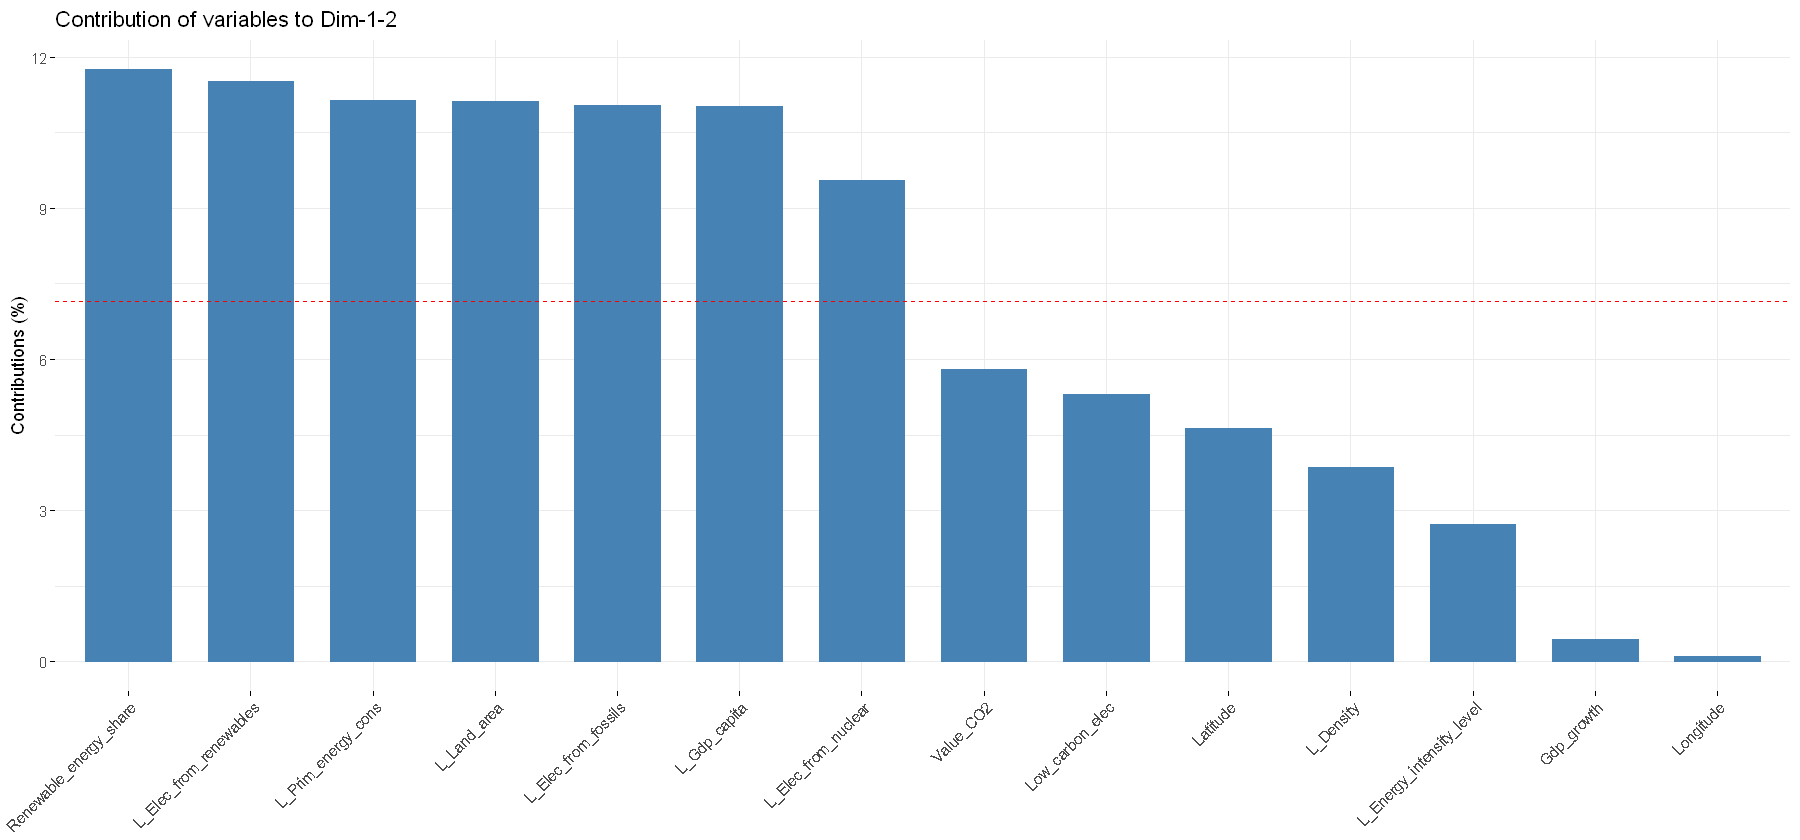

In [55]:
acp <- PCA(data_centre[,3:18], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)
# Décroissance des valeurs propres

g1<-fviz_eig(acp, addlabels = TRUE)
g1

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

fviz_contrib(acp, choice = "var", axes = c(1,2))

## On garderai 7 variables explicatives.

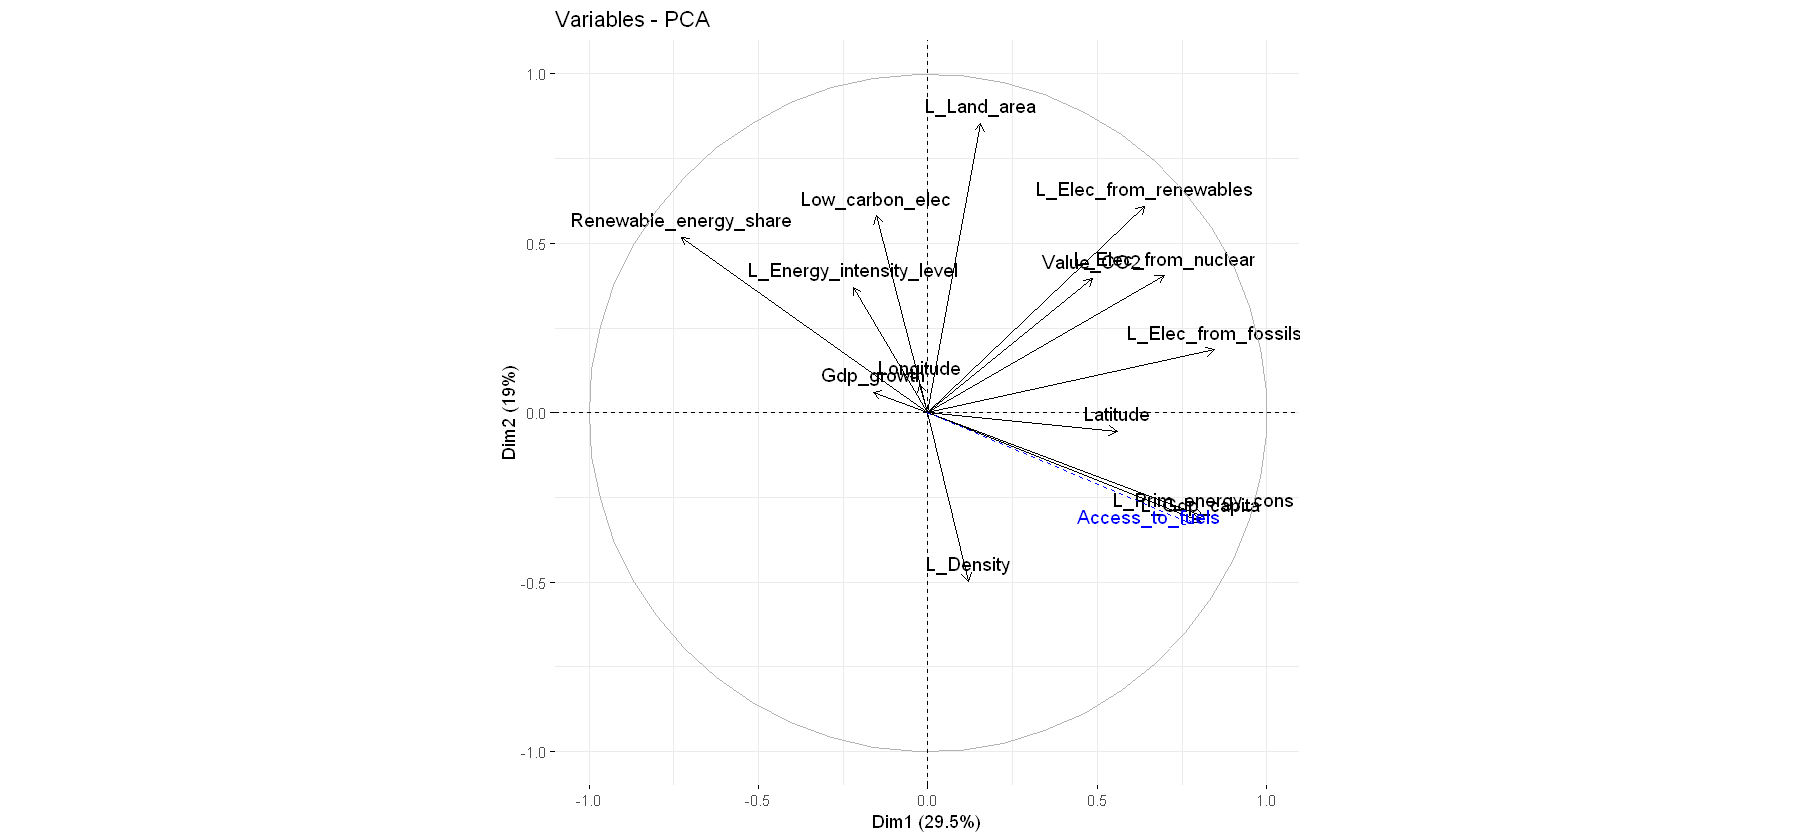

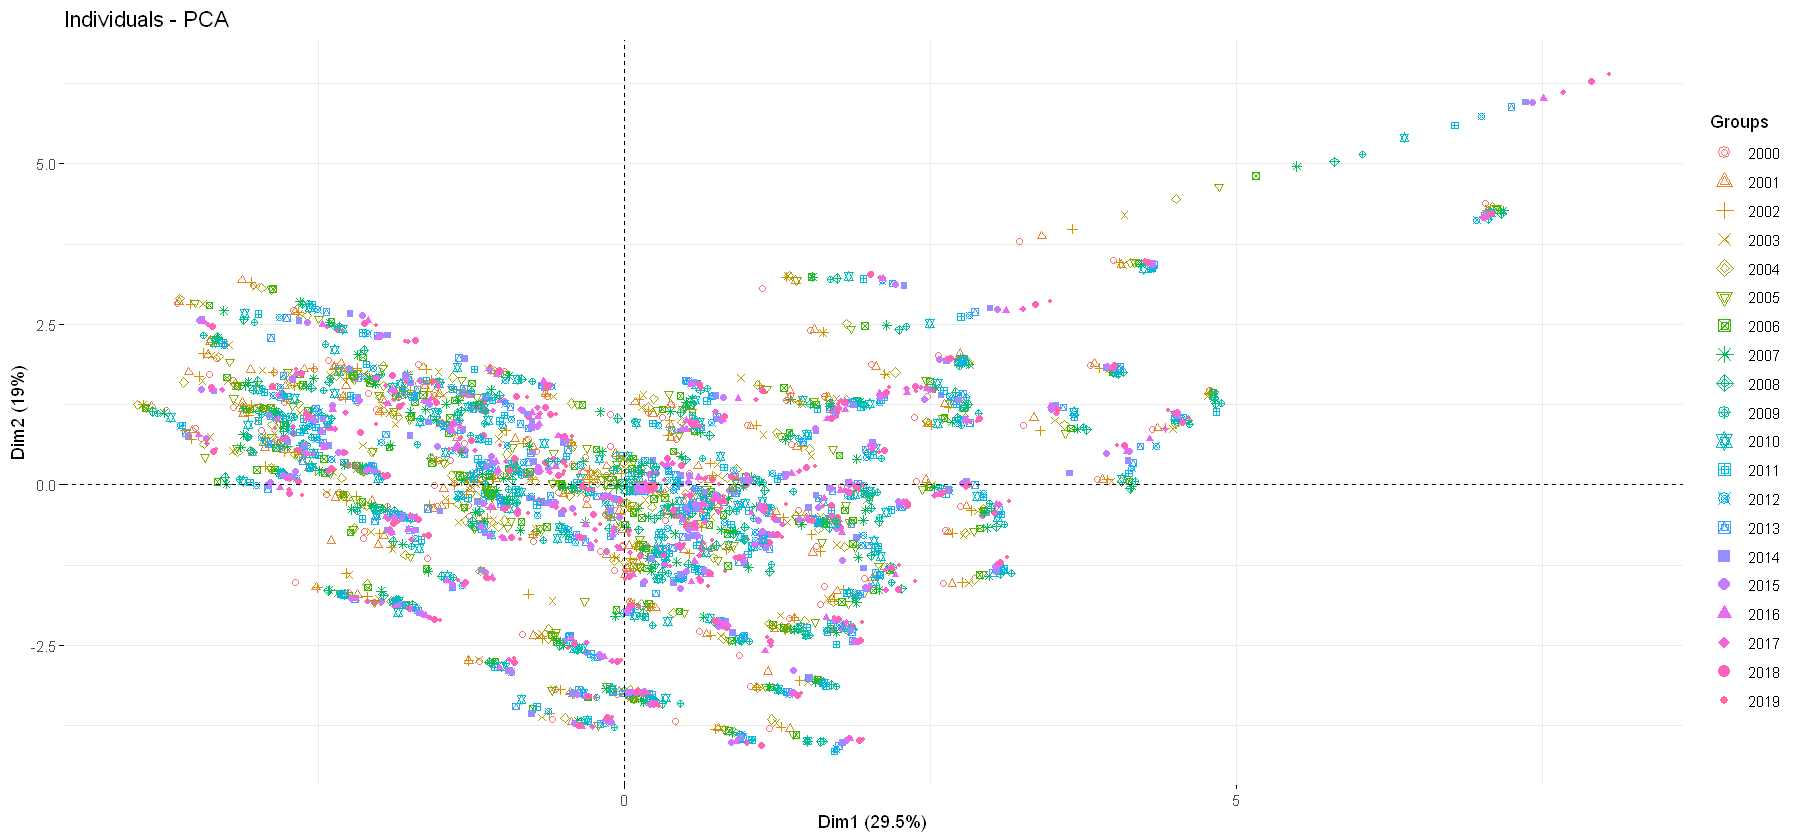

In [56]:
fviz_pca_var(acp)
# fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_ind(acp, label="none", habillage=data_centre$Year)

On garde 7 composantes principales qui représente environ 80% de la variance totale du jeu de données. 

La dimension 1 semble biene xpliquer Elex_from_fossil, Primary_energy_consumption et gsp_capita

La dimension 2 semble bien expliquer Land Area 

Value CO2 globalement expliqué par les 5 premières dimensions.



Il faudrait tenter d'afficher les differents graphes en fonction des differentes dimensions pour voir si on peut voir quelle composante représente à peu près quoi (comme en AdD en gros).

In [82]:
# ca marche pas lolilol
# data_reduced <- predict(acp)